In [165]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [166]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np

In [2]:
from tool.encode_materials import EncoderTool

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Alternative periodic tables

In this notebook, we generate some "periodic tables" by generating and clustering feature vectors for all chemical elements. We do so by either deducing similarities of elements from chemical formulas or by directly using physical properties of the elements.

### Method 1: Infer similarity between elements by stripping information from chemical formulas

In this method, we use the variational autoencoder which tries to reconstruct the chemical formulas of $50000$ materials by using a low dimension representation. After the training, this model gives a latent representation for every material and in particular for every monoatomic material. We use this representation to further cluster the elements. The idea behind this process is that elements which are similar tend to be more frequently substituted in chemical formulas. The vectors obtained after this encoding have dimension $d = 300$.

In [3]:
elements = ['H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'K', 'V', 'Y', 'I', 'W', 'He', 'Li', 'Be', 'Ne',
                        'Na', 'Mg', 'Al', 'Si', 'Cl', 'Ar', 'Ca', 'Sc', 'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
                        'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh',
                        'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
                        'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'Re', 'Os', 'Ir',
                        'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi']

In [4]:
# Groups
groups_elements = {
"metalloid":["B", "Si", "Ge", "As", "Sb", "Te", "Po", "P"],
"transition":["Sc", "Ti", "V", "Cr", "Mn",
              "Fe", "Co", "Ni", "Cu",
              "Y", "Zr", "Nb", "Mo", "Tc",
              "Ru", "Rh", "Pd", "Ag", "Hf", "Ta", "W", "Re",
              "Os", "Ir", "Pt", "Au",
              "Ac", "Rf", "Db", "Sg", "Bh",
              "Hs", "Mt", "Ds", "Rg", "Cn"],
"lanthanid":[
    "La", "Ce",
    "Pr", "Nd",
    "Pm", "Sm",
    "Eu", "Gd",
    "Tb", "Dy",
    "Ho", "Er",
    "Tm", "Yb",
    "Lu"],
"post transition":[
    'Al', 'Po', 'Ga', 'In', 'Tl', 'Sn', 'Pb', 'Bi',
    'Zn', 'Cd', 'Hg', 'At', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts'],
"alkali":['Li', 'Na', 'K', 'Rb', 'Cs', 'Fr'],
"alkaline":['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Ra'],
"halogens and chalcogens":['F', 'Cl', 'Br', 'I', 'At', 'Se', 'S'],
"light elements":['H', 'C', 'N', 'O'],
"noble elements":['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']}

In [5]:
encoder = EncoderTool(n=3, old=True)
encoded_elements = encoder.transform(elements)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


The clustering step is performed in two different ways. First, we use a t-SNE model to project the elements vectors onto a 2-dimensional space. This algorithm is a non-linear process based on a neural network and it models similar vectors by points that are close to each other. Here, it is only used as a visualization tool. We represent the results obtained by the t-SNE model in the following figure where the colors correspond to commonly defined chemical groups: transition elements, post-transition, metalloid, alkalis, alkalines, halogens / chalcogens, lanthanids, light elements and noble elements.

In [6]:
from sklearn.manifold import TSNE

In [7]:
import plotly.plotly as py
from plotly.offline import iplot
import plotly.graph_objs as go

In [8]:
tsne = TSNE(n_components=2, perplexity=5, n_iter=20000)
reduced_embedding = tsne.fit_transform(encoded_elements)

In [164]:
traces = []
groups_colors = {'metalloid': 'gray', 'transition': 'blue', 'lanthanid': 'pink', 'post transition': 'green', 
                 'alkali': 'orange', 'alkaline': 'red', 'halogens and chalcogens': 'purple', 'light elements': 'yellow', 
                 'noble elements': 'black'}

for group in groups_elements.keys():
    points = []
    names = []
    for i, element in enumerate(elements):
        if element in groups_elements[group]:
            points.append(reduced_embedding[i])
            names.append(element)
    points = np.array(points)
    trace = go.Scatter(
                        x = points[:,0],
                        y = points[:,1],
                        mode='markers+text',
                        name=group,
                        marker=dict(
                            size='10',
                            color=groups_colors[group]
                        ),
                        text=names,
                        textposition='bottom'
                        )
    traces.append(trace)

layout= go.Layout(
    title= '2D representation of materials',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Feature 1',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Feature 2',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True,
    width=1200
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='representation_elements')

We can interpret this graph as a continuous 2D periodic table. Is it interesting to see that, in this representation, elements which belong to the same traditional group tend to be close to each other. For example, alkalis and lanthanids are already well clustered. We then use a dendrogram to define clusters more formally. Here, the distance between two elements is defined as the euclidian norm of the difference between their $300$-dimensional representations. All elements that are closer than $D = 2$ are considered to be in the same cluster.

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [21]:
Z = linkage(encoded_elements, 'ward')

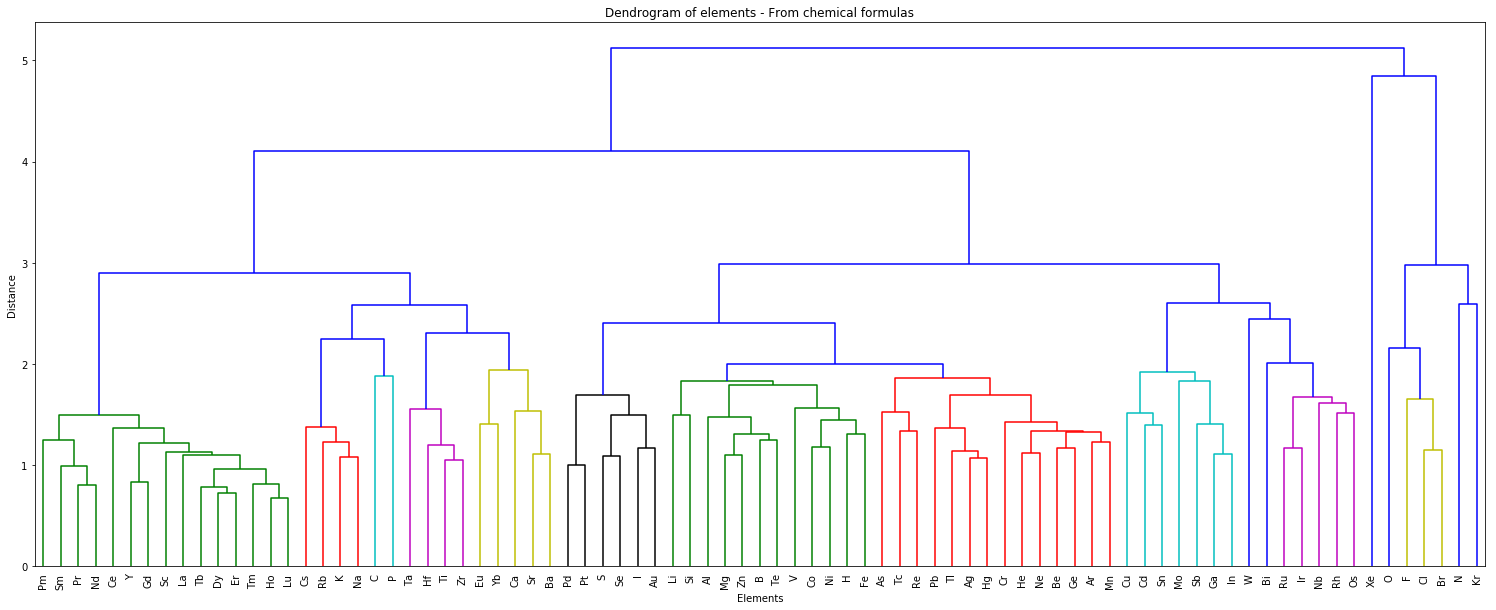

In [168]:
figure = plt.figure(figsize=(26, 10))
plt.title('Dendrogram of elements - From chemical formulas')
plt.xlabel('Elements')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=elements,
    color_threshold=2,
    leaf_rotation=90.,
    leaf_font_size=10.,
    distance_sort='descending'
)
plt.show()

Here again, this graph conforms that some chemical groups defined by the traditional periodic table are conserved: the lanthanids groups (left green), the alkalis (left red), the halogens (right yellow). Also, elements that appear in the same columns are often in the same cluster like showed by $Ca$, $Sr$ and $Ba$ in the yellow cluster.

### Method 2 - Infer similarities by using physical attributes

The second method uses physical attributes of the elements to build their feature vectors. Specifically, for every element, we use the following properties: density, melting point, atomic radius, specific volume, specific heat, heat fusion, heat evaporation, thermal conductivity, pauling electronegativity, first ionisation energy and lattice constant. When one of this property is unavailable for a specific element, this attribute is arbitrary set to $0$. The table here below shows the values used for the same elements analyzed in the first method.

In [59]:
import pandas as pd

In [135]:
periodic_table = pd.read_csv('periodic_elements_csv')
periodic_table = periodic_table.drop(columns=[' Atomic_Number', ' Atomic_Weight', ' Covalent_Radius', ' Ionic_Radius', ' Oxidation_States', ' Electronic_Configuration', 
                                      ' Lattice', 'Name'])

indices_to_drop = []
for i in range(len(periodic_table)):
    if periodic_table.iloc[i][' Symbol'].replace(' ','') not in elements:
        indices_to_drop.append(i)

periodic_table = periodic_table.drop(periodic_table.index[indices_to_drop])

for i in range(len(periodic_table)):
    for col in columns:
        try:
            if ' ' in periodic_table.iloc[i][col]:
                periodic_table.iloc[i][col] = periodic_table.iloc[i][col].split(' ')[1]
            if col != ' Symbol':
                periodic_table.iloc[i][col] = eval((periodic_table.iloc[i][col]).replace('<', '').replace('>', '').replace('~','').replace('-','0'))
        except:
            periodic_table.iloc[i][col] = 0
periodic_table

,Symbol,Density,Melting_Point,Boiling_Point,Atomic_Radius,Specific_Volume,Specific_Heat,Heat_Fusion,Heat_Evaporation,Thermal_Conductivity,Pauling_Electronegativity,First_Ionisation_Energy,Lattice_Constant
0,H,0.0708,14.01,20.28,79,14.1,0,0.117,0.904,0.1815,2.2,1311.3,3.75
1,He,0.147,0.95,4.216,0,31.8,5.188,0,0.08,0.152,0,2361.3,3.57
2,Li,0.534,553.69,1118.15,155,13.1,3.489,2.89,148,84.8,0.98,519.9,3.49
3,Be,1.848,1551,3243,112,5,1.824,12.21,309,201,1.57,898.8,2.29
4,B,2.34,2573,3931,98,4.6,1.025,23.6,504.5,27.4,2.04,800.2,8.73
5,C,2.25,3820,5100,91,5.3,0.711,0,0,1.59,2.55,1085.7,3.57
6,N,0.808,63.29,77.4,92,17.3,0,0,0,0.026,3.04,1401.5,4.039
7,O,1.149,54.8,90.19,0,14,0,0,0,0.027,3.44,1313.1,6.83
8,F,1.108,53.53,85.01,0,17.1,0,0.51,6.54,0.028,3.98,1680,0
9,Ne,1.204,48,27.1,0,16.8,1.029,0,1.74,0.0493,0,2079.4,4.43


In [142]:
elements_csv, X = periodic_table.values[:,0], periodic_table.values[:,1:]
elements_csv =[el.replace(' ','') for el in elements_csv]

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [175]:
tsne_properties = TSNE(n_components=2, perplexity=4, n_iter=20000)
reduced_X = tsne_properties.fit_transform(X)

In the same way that earlier, we use a t-SNE model to project these vectors onto a space of dimension $2$. The color code still represents usual chemical groups

In [176]:
traces = []
for group in groups_elements.keys():
    points = []
    names = []
    for i, element in enumerate(elements_csv):
        if element in groups_elements[group]:
            points.append(X[i])
            names.append(element)
    points = np.array(points)
    trace = go.Scatter(
                        x = points[:,0],
                        y = points[:,1],
                        mode='markers+text',
                        name=group,
                        marker=dict(
                            size='10',
                            color=groups_colors[group]
                        ),
                        text=names,
                        textposition='bottom'
                        )
    traces.append(trace)

layout= go.Layout(
    title= '2D representation of materials',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Feature 1',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Feature 2',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='representation_elements_2')

This representation gives complement information to the first model. Indeed, some traditional chemical groups seem to be more respected in this representation. For example, except for the aluminium $Al$, the post-transition elements are now easily separable from the other elements. In the same way, alkalines are close to each other and could be easily separable if we exclude aluminium. However, some other chemical groups are less isolated like the alkalis and the halogens, conversely to what was observed in the first representation. Once again, we can define clusters more formally by looking at the pair-wise distances between the elements. With the same definition than above, elements now belong to the same clusters if they are closer than $d = 5$.

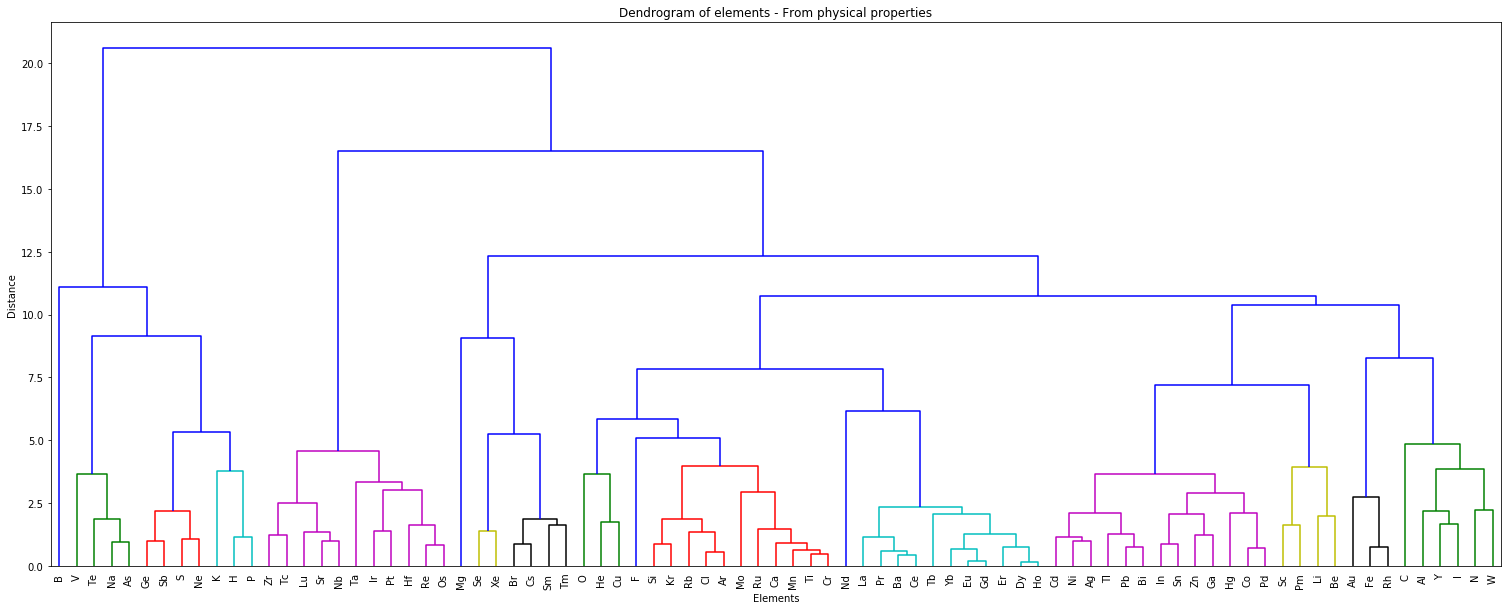

In [167]:
Z_bis = linkage(X, 'ward')
figure = plt.figure(figsize=(26, 10))
plt.title('Dendrogram of elements - From physical properties')
plt.xlabel('Elements')
plt.ylabel('Distance')
dendrogram(
    Z_bis,
    labels=elements,
    color_threshold=5,
    leaf_rotation=90.,
    leaf_font_size=10.,
    distance_sort='descending'
)
plt.show()